In [31]:
ls

gym_data.csv  random_forest_regression.ipynb


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time

In [33]:
df = pd.read_csv('gym_data.csv')
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [35]:
df.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

In [36]:
df = df.drop('date' , axis=1)

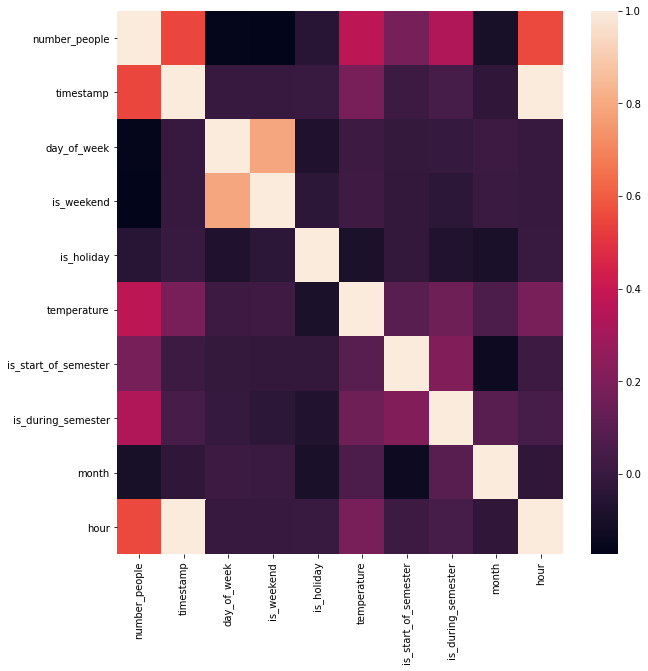

In [37]:
plt.figure(figsize=(10 , 10))
sns.heatmap(df.corr())

In [38]:
def time_to_seconds(time):
    return time.hour * 3600 + time.minute * 60 + time.second

In [39]:
# center timestamp
noon = time_to_seconds(time(12, 0, 0))
df.timestamp = df.timestamp.apply(lambda t: abs(noon - t))
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,18011,4,0,0,71.76,0,0,8,17
1,45,19214,4,0,0,71.76,0,0,8,17
2,40,19815,4,0,0,71.76,0,0,8,17
3,44,20416,4,0,0,71.76,0,0,8,17
4,45,21017,4,0,0,71.76,0,0,8,17


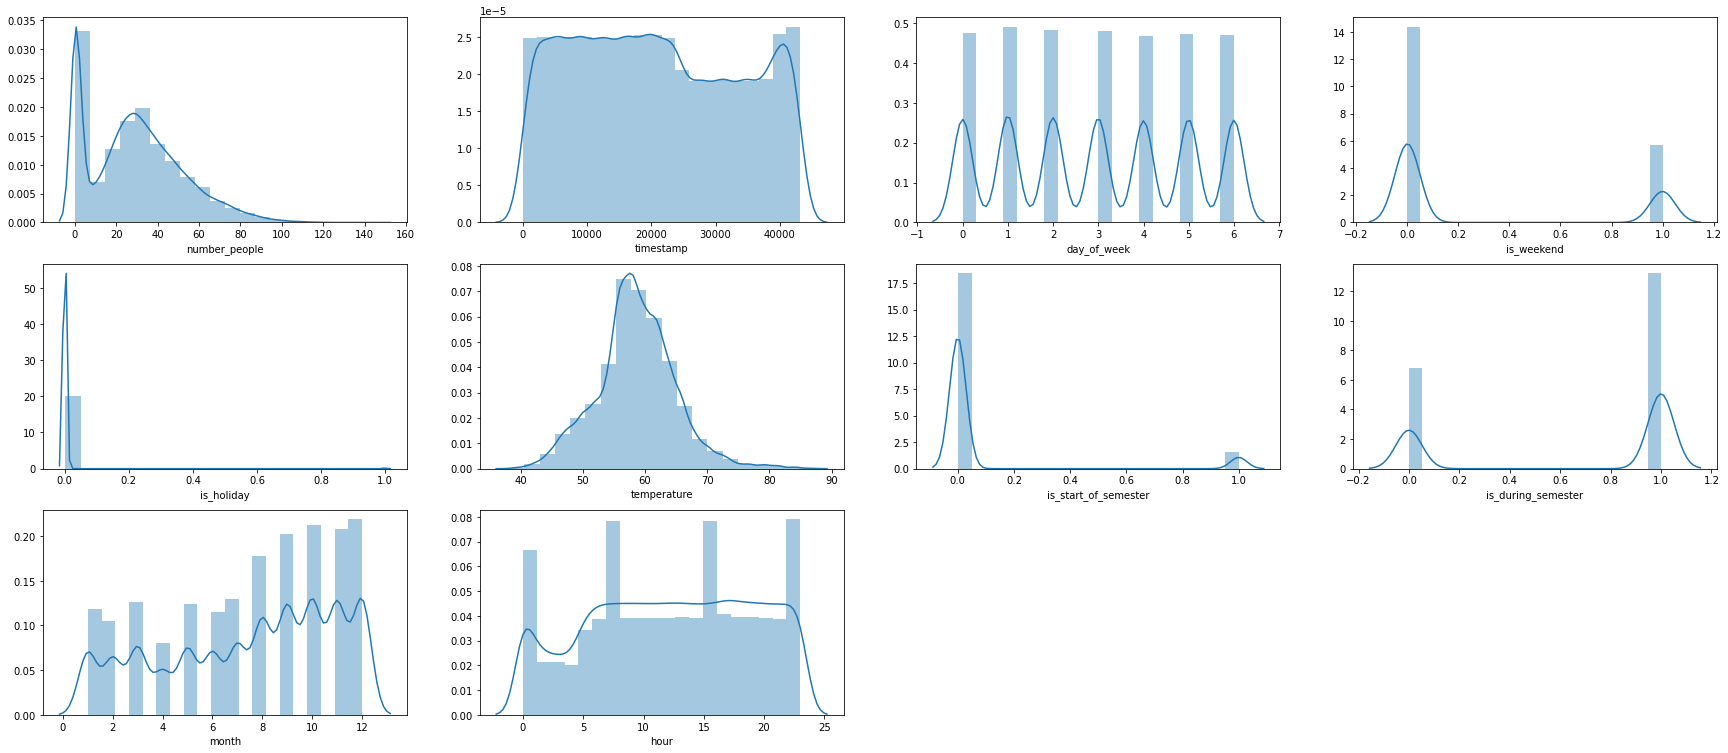

In [40]:
plt.figure(figsize=(30,40))

for i , val in enumerate(df.keys()):
    plt.subplot(9,4,i+1)
    sns.distplot(df[val] , bins=20)

# splitting

In [41]:
from sklearn.model_selection import train_test_split
X = df.iloc[: , 1:].values
Y = df.iloc[: , 0:1].values
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.2)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)
print(y_test)

(49747, 9) (12437, 9) (49747, 1) (12437, 1)
[[26]
 [ 0]
 [35]
 ...
 [40]
 [41]
 [27]]


# Fetaure Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc = sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [52]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_jobs=-1)
y_train = y_train.flatten()
clf  = clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
print(y_pred , y_test.flatten())


[26.34  0.   34.21 ... 44.6  49.39 28.14] [26  0 35 ... 40 41 27]


# Accuracy


In [53]:
print(y_pred.shape , y_test.flatten().shape)
print(clf.score(x_test , y_test))

(12437,) (12437,)
0.9203993159948086


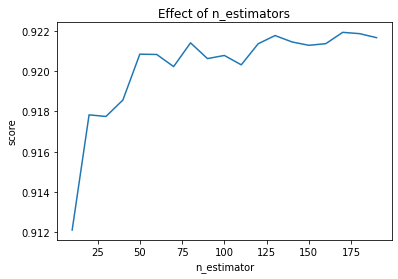

In [58]:


# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    clf.set_params(n_estimators=n)
    clf.fit(x_train, y_train)
    scores.append(clf.score(x_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

